In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
df = pd.read_csv('data_sets/red_wine_quality.csv')

In [285]:
df=df.drop(columns=['quality'])

In [286]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [287]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [288]:
# data has only numerical columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [289]:
df.shape

(1599, 11)

In [290]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [291]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Text(0.5, 1.0, 'Box PLot of Columns')

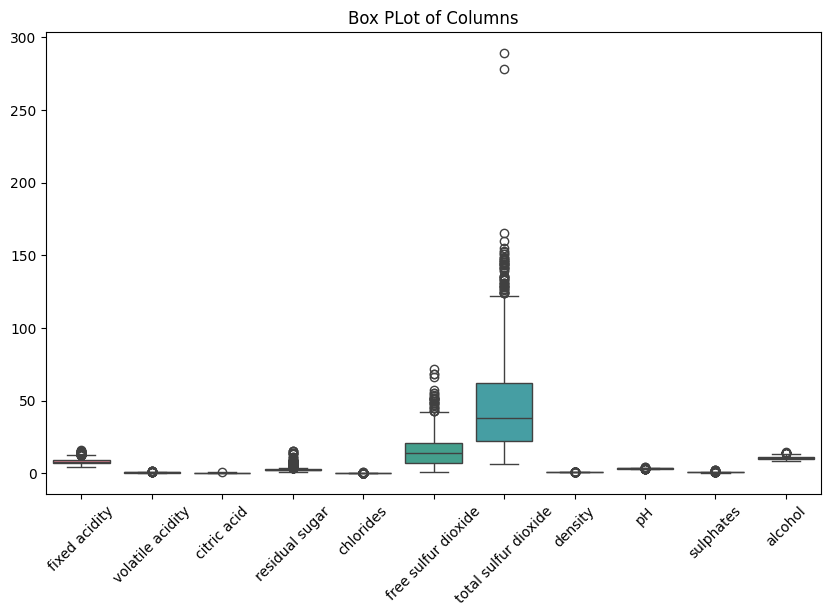

In [292]:
# since data has no missing values check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.title('Box PLot of Columns')

In [301]:
def remove_outliers_iqr(data):
    cleaned_data = data.copy()
    
    
    for col in data.columns:
            if col in data.columns:  
                 Q1 = data[col].quantile(0.25)
                 Q3 = data[col].quantile(0.75)
                 IQR = Q3 - Q1
                 lower_bound = Q1 - 1.5 * IQR
                 upper_bound = Q3 + 1.5 * IQR
                 cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

df =remove_outliers_iqr(df) # removing outliers

Text(0.5, 1.0, 'Box PLot of Numerical Columns')

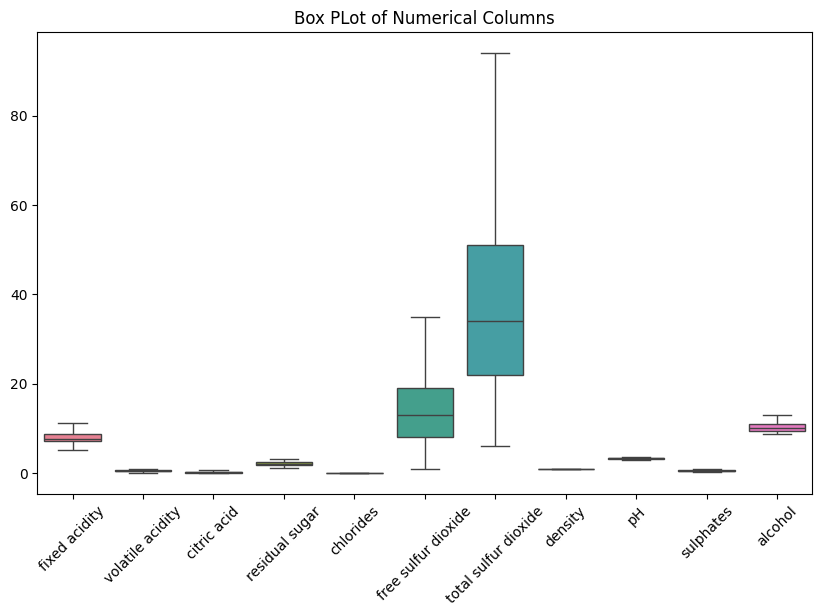

In [302]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.title('Box PLot of Numerical Columns') # to check outliers after removing it

In [303]:
df.shape
# after removing outliers now we check distribution of data

(927, 11)

In [304]:
import scipy.stats as stats

## Visualization test

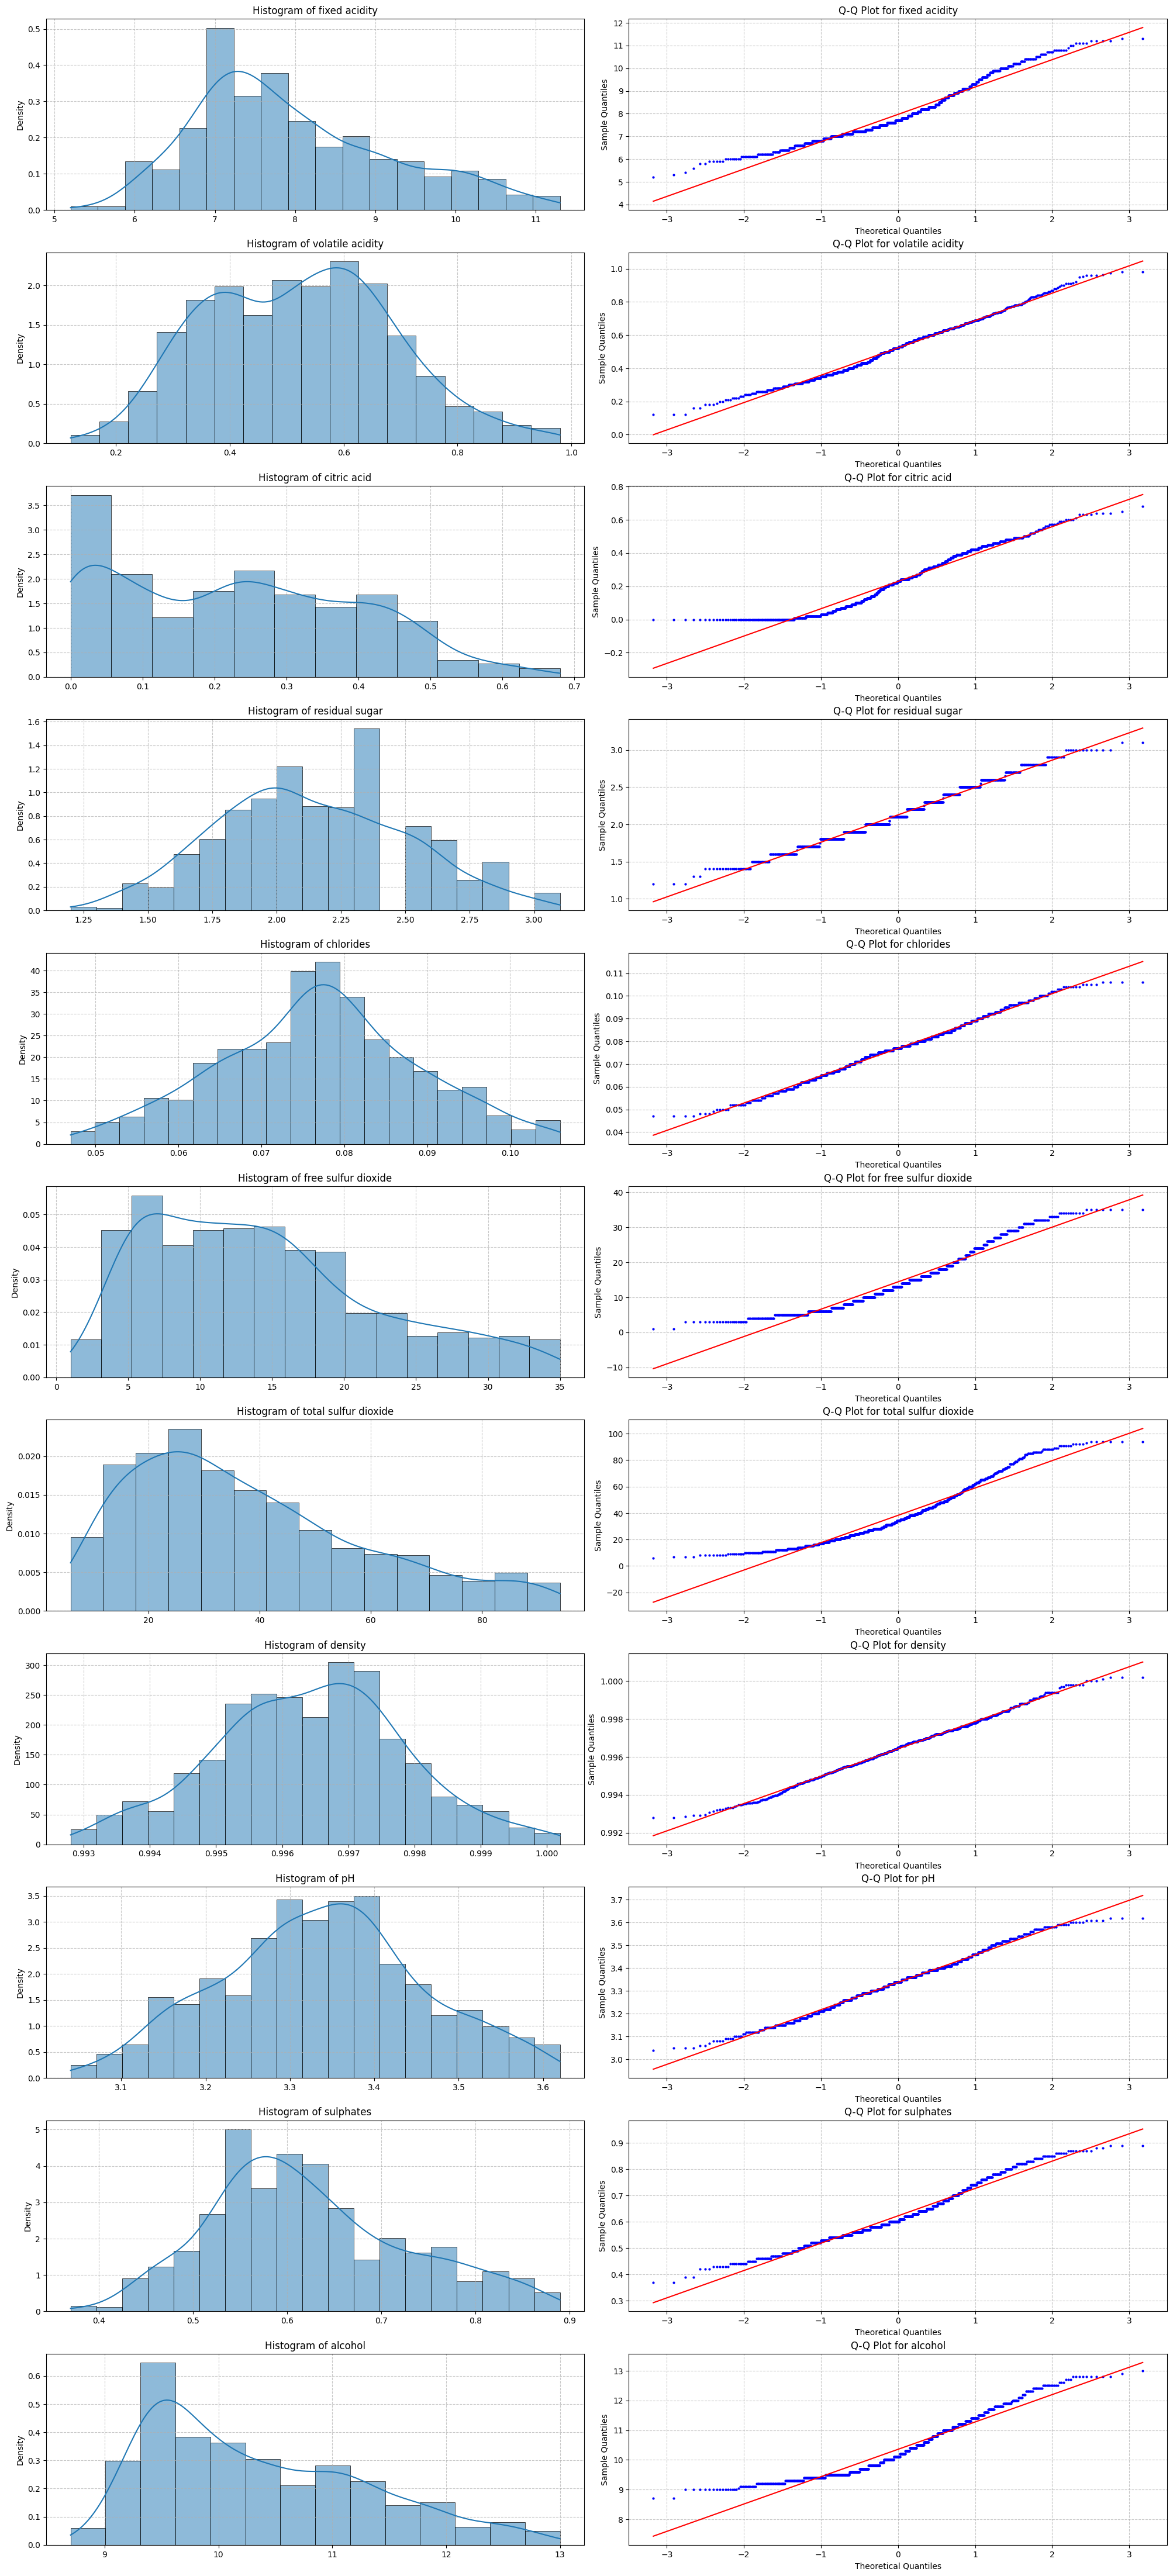

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Number of columns (features) in the DataFrame
num_cols = len(df.columns)

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_cols, 2, figsize=(20, num_cols * 4))

# Plotting histograms and Q-Q Plots for each numerical column
for i, col in enumerate(df.columns):
    # Histogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], stat='density', linewidth=0.5)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)

    # Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].get_lines()[0].set_markersize(2.0)  # Adjust marker size for clarity
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 1].set_title(f'Q-Q Plot for {col}')
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel('Sample Quantiles')

# Adjust layout and display the plots
plt.tight_layout(pad=0.5)
plt.show()


## Statistical Test

In [306]:
from scipy.stats import anderson, jarque_bera, shapiro, normaltest, kstest
from statsmodels.stats.diagnostic import lilliefors 

In [307]:
# Function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')
    print('\n')
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')
    print('\n')
    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.critical_values}')
    print(f'Anderson-Darling Test: Critical Values:{result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test :{col} looks normally distribuited (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test :{col} does not look normally distribuited (reject H0)')
    print('\n')
    #Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB Statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')
    print('\n')
    # D'Agostino and Pearson's Test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    print('\n')
    # Kolmogorov-Smirnov Test
    ks_stat, p_ks = kstest(df[col],'norm')
    print(f'Kolmogorov-Smirnov Test: KS Statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
    print('\n')    
    # Lilliefors Test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')

    print('\n')
    print('\n')
    print('\n')

# Perform normality tests for each numerical column
for col in df.columns:
    test_normality(df, col)
        


Column: fixed acidity


Shapiro-Wilk Test: Statistics=0.959, p-value=0.000
Shapiro-Wilk Test: fixed acidity does not look normally distributed (reject H0)


Anderson-Darling Test: Statistics=[0.574 0.653 0.784 0.914 1.087]
Anderson-Darling Test: Critical Values:[0.574 0.653 0.784 0.914 1.087]
Anderson-Darling Test :fixed acidity does not look normally distribuited (reject H0)


Jarque-Bera Test: JB Statistic=61.651, p-value=0.000
Jarque-Bera Test: fixed acidity does not look normally distributed (reject H0)


D'Agostino and Pearson's Test: Statistics=54.790, p-value=0.000
D'Agostino and Pearson's Test: fixed acidity does not look normally distributed (reject H0)


Kolmogorov-Smirnov Test: KS Statistic=1.000, p-value=0.000
Kolmogorov-Smirnov Test: fixed acidity does not look normally distributed (reject H0)


Lilliefors Test: Statistics=0.105, p-value=0.001
Lilliefors Test: fixed acidity does not look normally distributed (reject H0)






Column: volatile acidity


Shapiro-Wilk Test: S

# Exploytary Data Analysis

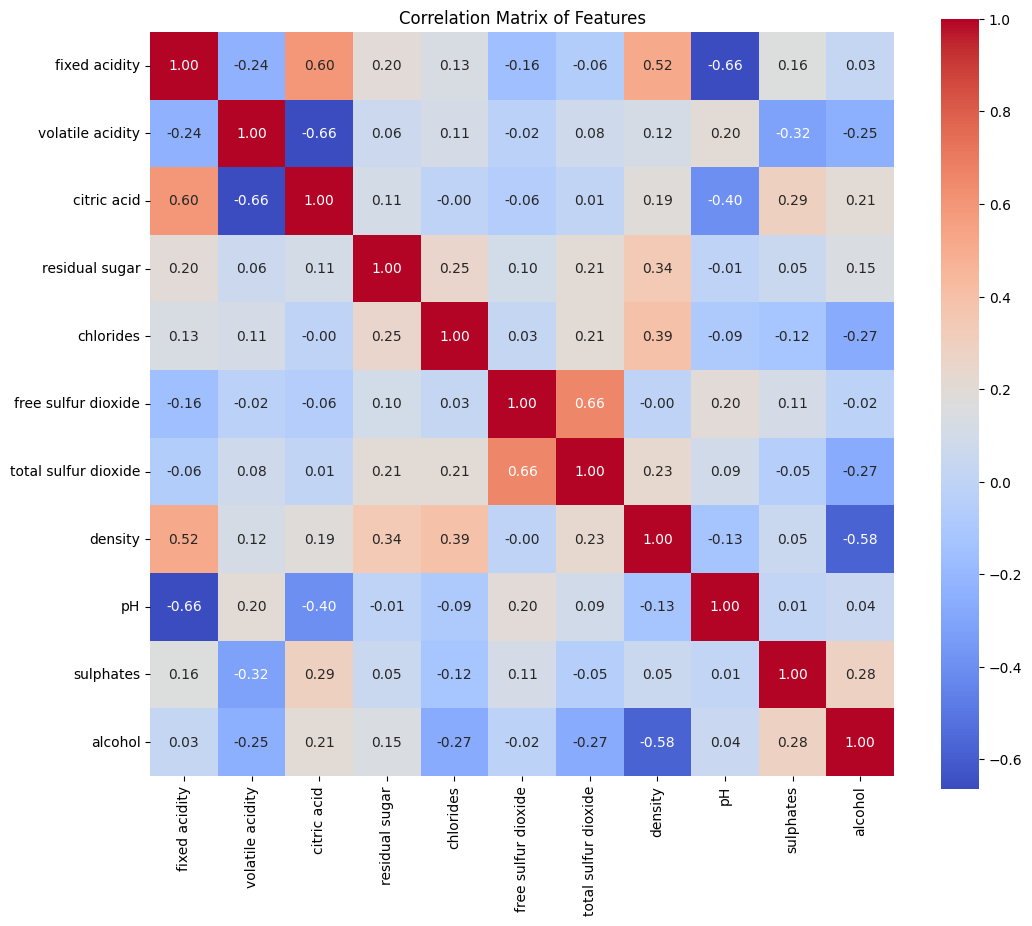

In [308]:

correlation_matrix =  df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt=".2f", square=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [310]:
df['alcohol'].value_counts()

alcohol
9.500000     84
9.400000     58
9.800000     52
10.000000    47
9.600000     40
9.700000     39
11.000000    37
9.200000     36
9.300000     36
10.500000    34
10.400000    32
10.100000    30
11.200000    25
10.200000    25
10.900000    22
10.800000    22
11.400000    21
10.300000    21
10.600000    20
11.100000    20
11.300000    18
9.900000     18
11.800000    18
10.700000    16
11.500000    16
9.000000     15
11.900000    15
11.700000    14
9.100000     12
12.500000    11
11.600000    10
12.400000     9
12.800000     9
12.000000     9
12.300000     8
12.100000     6
12.200000     4
12.700000     3
12.600000     3
8.700000      2
9.550000      2
12.900000     1
13.000000     1
11.066667     1
11.950000     1
9.950000      1
9.050000      1
10.750000     1
10.550000     1
Name: count, dtype: int64

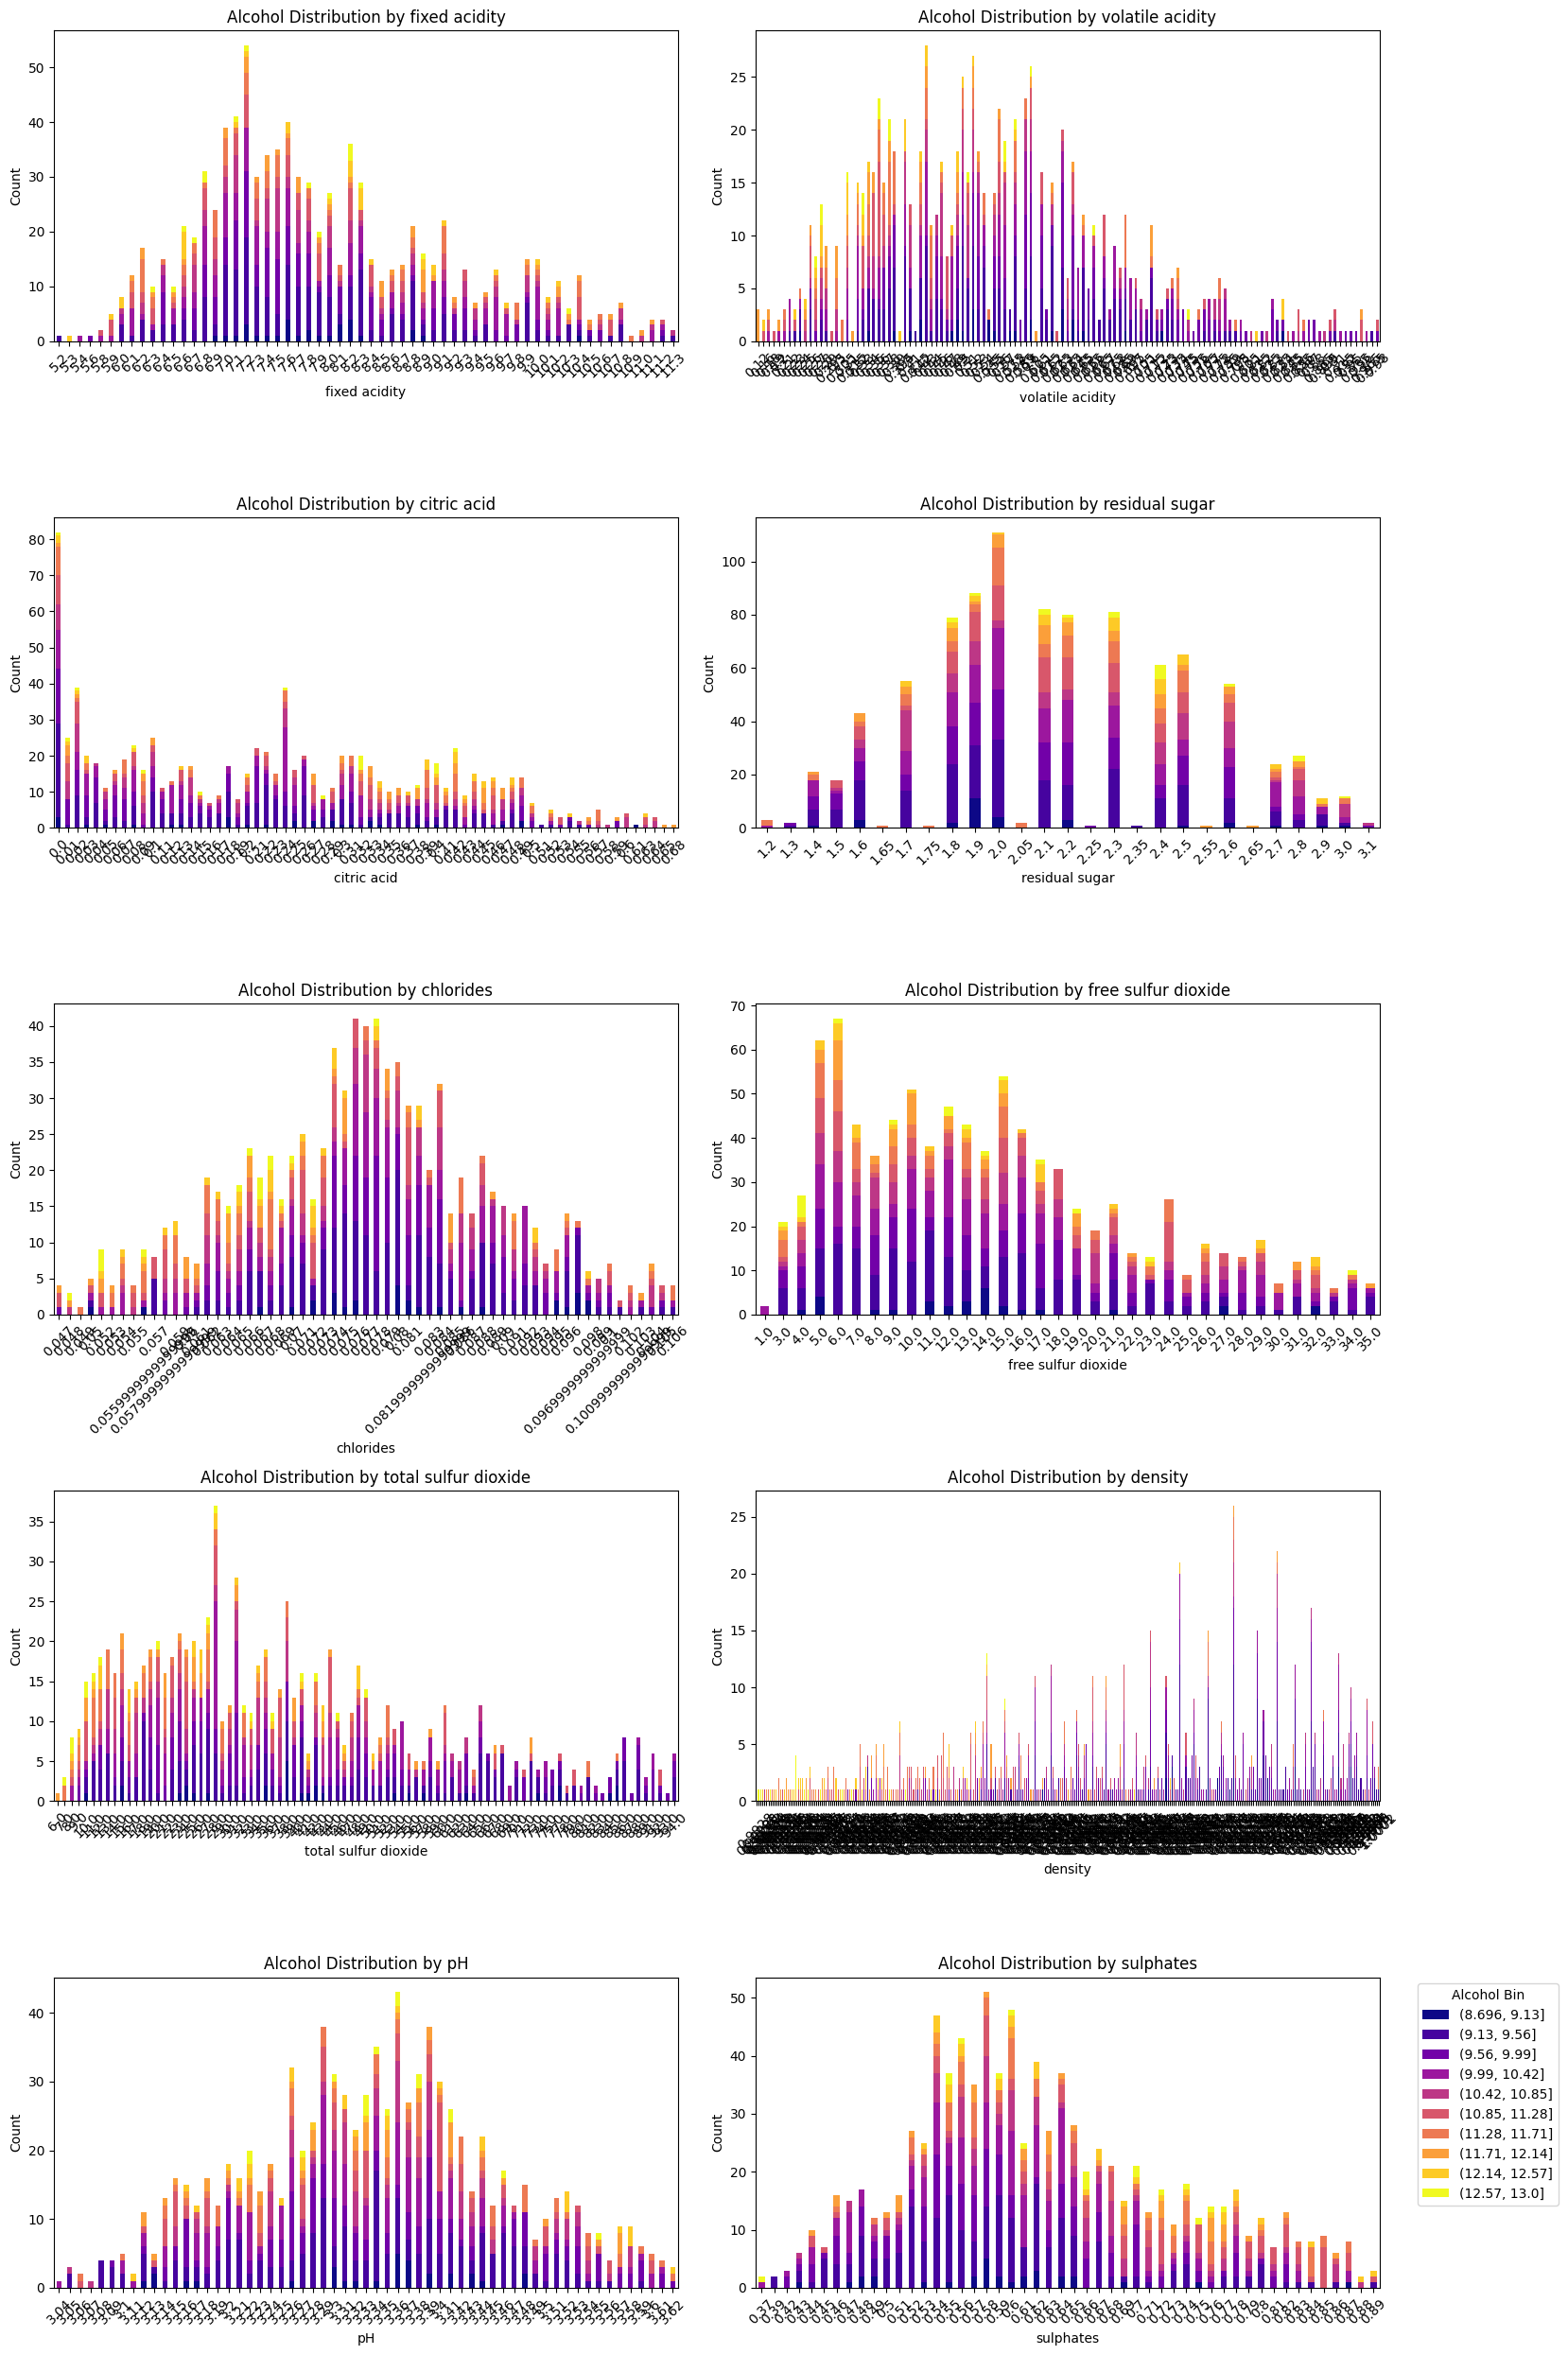

In [311]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and columns_to_plot is defined as:
# Exclude columns that are not needed for plotting
columns_to_plot = [col for col in df.columns if col not in ['alcohol']]

# Calculate number of rows and columns for subplot grid
num_cols = 2  # Number of columns in subplot layout
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Calculate number of rows needed

# Adjust figure size based on number of subplots
fig_width = 15
fig_height = num_rows * 5  # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

# Iterate through each column and plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Plot alcohol percentage distribution
    alcohol_cross = pd.crosstab(index=df[col], columns=pd.cut(df['alcohol'], bins=10))  # Binning alcohol for better visualization
    alcohol_cross.plot(kind='bar', stacked=True, ax=plt.gca(), legend=None, colormap='plasma')
    
    plt.title(f'Alcohol Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Adjust layout and display the plot
plt.tight_layout()
plt.legend(title='Alcohol Bin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [312]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column} column:")
    print(unique_values)
    print()

Unique values in fixed acidity column:
[ 7.4  7.8 11.2  7.9  7.3  6.7  5.6  8.9  7.6  8.5  6.9  6.3  7.1  5.2
  8.1  8.8  6.8  6.4  6.6  7.5  7.   9.3  7.7  8.3  9.7  6.2  7.2  8.
 10.1  9.4  6.1  8.4  5.8  8.2  9.6 11.   8.7  8.6  9.  10.8 11.1 10.
 10.4 10.6 10.3 10.7  9.1  9.5  9.8  5.3  9.2  9.9 10.5 10.2 10.9 11.3
  6.5  5.9  6.   5.4]

Unique values in volatile acidity column:
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.615 0.22  0.39  0.49
 0.4   0.41  0.71  0.645 0.675 0.685 0.32  0.38  0.61  0.67  0.52  0.5
 0.59  0.735 0.705 0.63  0.69  0.785 0.75  0.45  0.3   0.55  0.62  0.775
 0.9   0.545 0.575 0.33  0.31  0.54  0.56  0.695 0.745 0.715 0.415 0.68
 0.95  0.53  0.42  0.805 0.73  0.37  0.43  0.725 0.57  0.625 0.34  0.635
 0.82  0.35  0.975 0.36  0.83  0.18  0.29  0.77  0.46  0.815 0.795 0.665
 0.765 0.24  0.26  0.51  0.44  0.84  0.96  0.78  0.23  0.27  0.21  0.64
 0.48  0.825 0.72  0.585 0.915 0.835 0.845 0.47  0.8   0.92  0.74  0.91
 0.98  0.87  0.655 0.25  0.305 0.315

In [313]:
df.to_csv('data_sets/filtered_data.csv',index = False)

# Working with Filtered Datasets and Analysis of the data

In [314]:
data = pd.read_csv('Data_sets/filtered_data.csv')

In [315]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Changing Numerical columns into Standard scaler

In [316]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Define the numerical columns to be scaled, excluding 'alcohol' and 'quality'
numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                  'pH', 'sulphates']

# Assuming `data` is your DataFrame containing the columns
# Create and fit the pipeline for scaling
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
numerical_data = numerical_pipeline.fit_transform(data[numerical_cols])

# Convert the scaled data back to a DataFrame
numerical_data_df = pd.DataFrame(numerical_data, columns=numerical_cols)

# Concatenate the scaled numerical data with the unscaled 'alcohol' and 'quality' columns
final_data = pd.concat([numerical_data_df, data[['alcohol']]], axis=1)

# Display the final DataFrame
print(final_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.463779          1.070308    -1.361974       -0.616058  -0.074556   
1      -0.137276          2.160443    -1.361974        1.282137   1.752973   
2      -0.137276          1.433686    -1.124217        0.468625   1.254556   
3       2.638003         -1.473343     1.966626       -0.616058  -0.157626   
4      -0.463779          1.070308    -1.361974       -0.616058  -0.074556   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.425386             -0.200047  0.953397  1.433457  -0.597417   
1             1.320552              1.350010  0.259944 -1.150326   0.544647   
2             0.073454              0.739382  0.398634 -0.650239   0.259131   
3             0.322873              1.021210  1.092087 -1.483718  -0.407073   
4            -0.425386             -0.200047  0.953397  1.433457  -0.597417   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3   

In [317]:
final_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.463779,1.070308,-1.361974,-0.616058,-0.074556,-0.425386,-0.200047,0.953397,1.433457,-0.597417,9.4
1,-0.137276,2.160443,-1.361974,1.282137,1.752973,1.320552,1.350010,0.259944,-1.150326,0.544647,9.8
2,-0.137276,1.433686,-1.124217,0.468625,1.254556,0.073454,0.739382,0.398634,-0.650239,0.259131,9.8
3,2.638003,-1.473343,1.966626,-0.616058,-0.157626,0.322873,1.021210,1.092087,-1.483718,-0.407073,9.8
4,-0.463779,1.070308,-1.361974,-0.616058,-0.074556,-0.425386,-0.200047,0.953397,1.433457,-0.597417,9.4


# Implementing dataset into model

In [319]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
import joblib
import matplotlib.pyplot as plt


# Extract features (X) and target variable (y)
X = final_data.drop(columns=['alcohol'])
y = final_data['alcohol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [320]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Training MSE: 0.03
Testing MSE: 0.21
Training R-squared: 0.96
Testing R-squared: 0.76
Model saved at ML_MODEL/random_forest_model.pkl


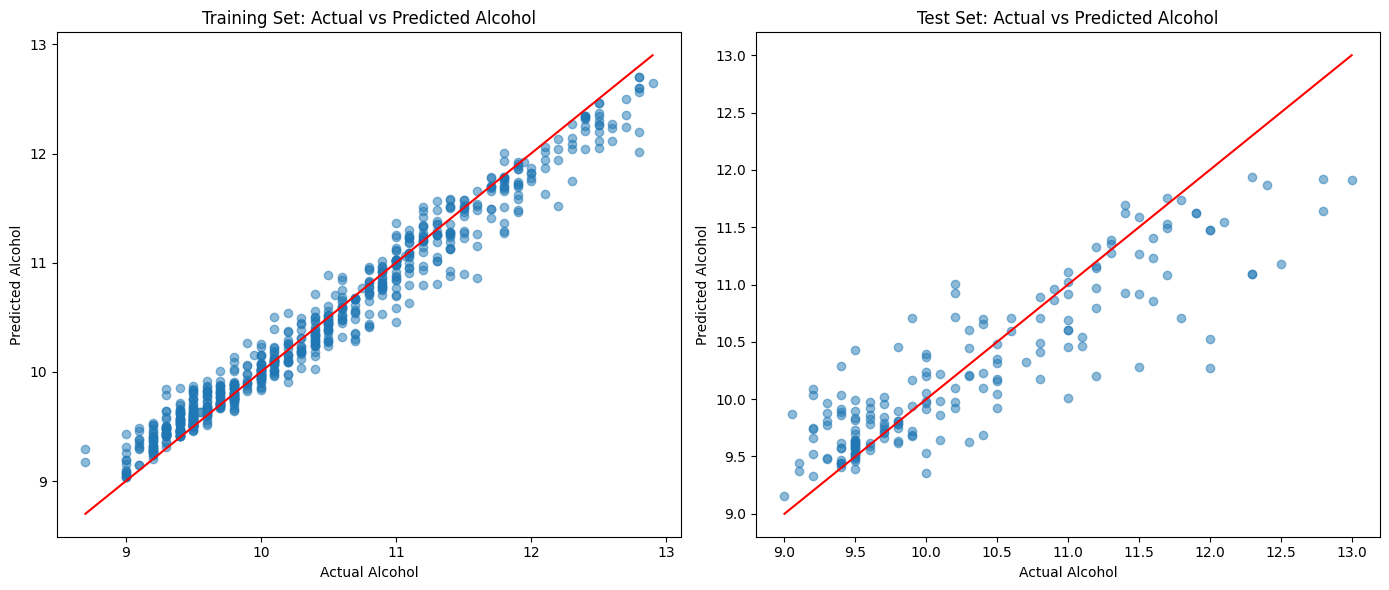

In [321]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared scores for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.2f}')
print(f'Testing MSE: {test_mse:.2f}')
print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# Visualize the performance with scatter plots (optional)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Training Set: Actual vs Predicted Alcohol')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Test Set: Actual vs Predicted Alcohol')

plt.tight_layout()
plt.show()

In [322]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
import joblib
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `final_data` with your data

# Extract features (X) and target variable (y)
X = final_data.drop(columns=['alcohol'])
y = final_data['alcohol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
# Initialize the model
model = XGBRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Training MSE: 0.00
Testing MSE: 0.22
Training R-squared: 1.00
Testing R-squared: 0.75
Model saved at ML_MODEL/xgboost_model.pkl


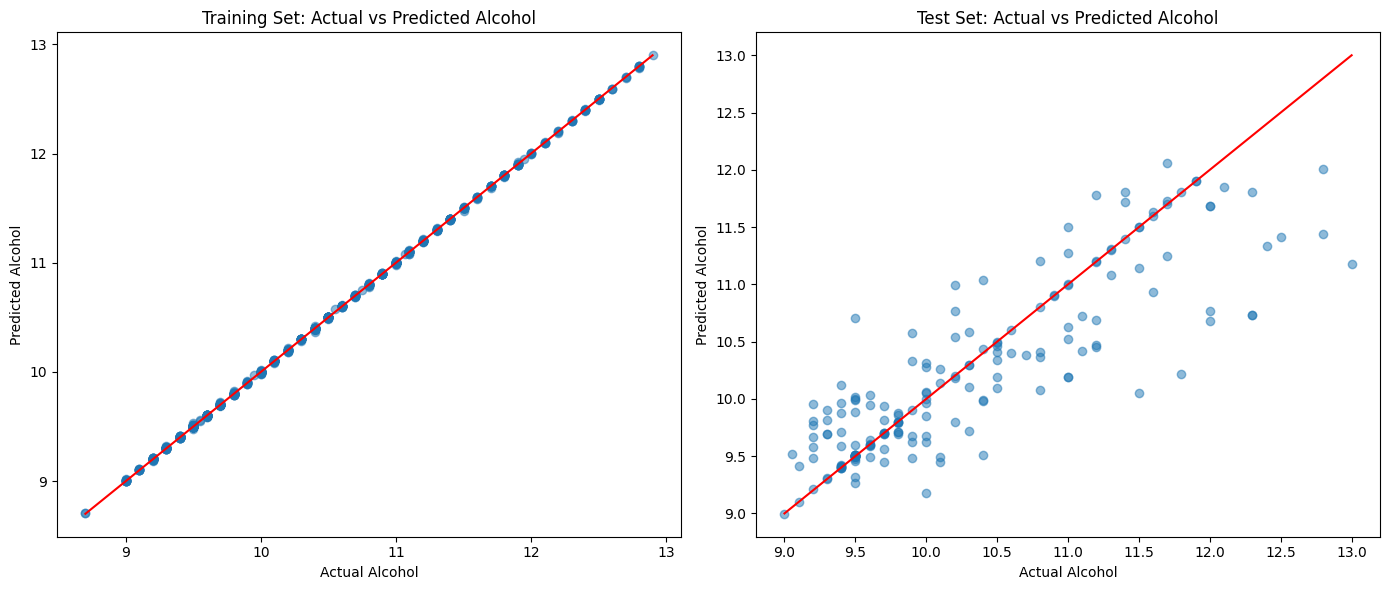

In [324]:

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared scores for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.2f}')
print(f'Testing MSE: {test_mse:.2f}')
print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/xgboost_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# Visualize the performance with scatter plots (optional)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Training Set: Actual vs Predicted Alcohol')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Test Set: Actual vs Predicted Alcohol')

plt.tight_layout()
plt.show()

In [325]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
import joblib
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `final_data` with your data

# Extract features (X) and target variable (y)
X = final_data.drop(columns=['alcohol'])
y = final_data['alcohol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [326]:
# Initialize the model
model = MLPRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42)

Training MSE: 1.37
Testing MSE: 1.59
Training R-squared: -0.51
Testing R-squared: -0.81
Model saved at ML_MODEL/neural_network_model.pkl


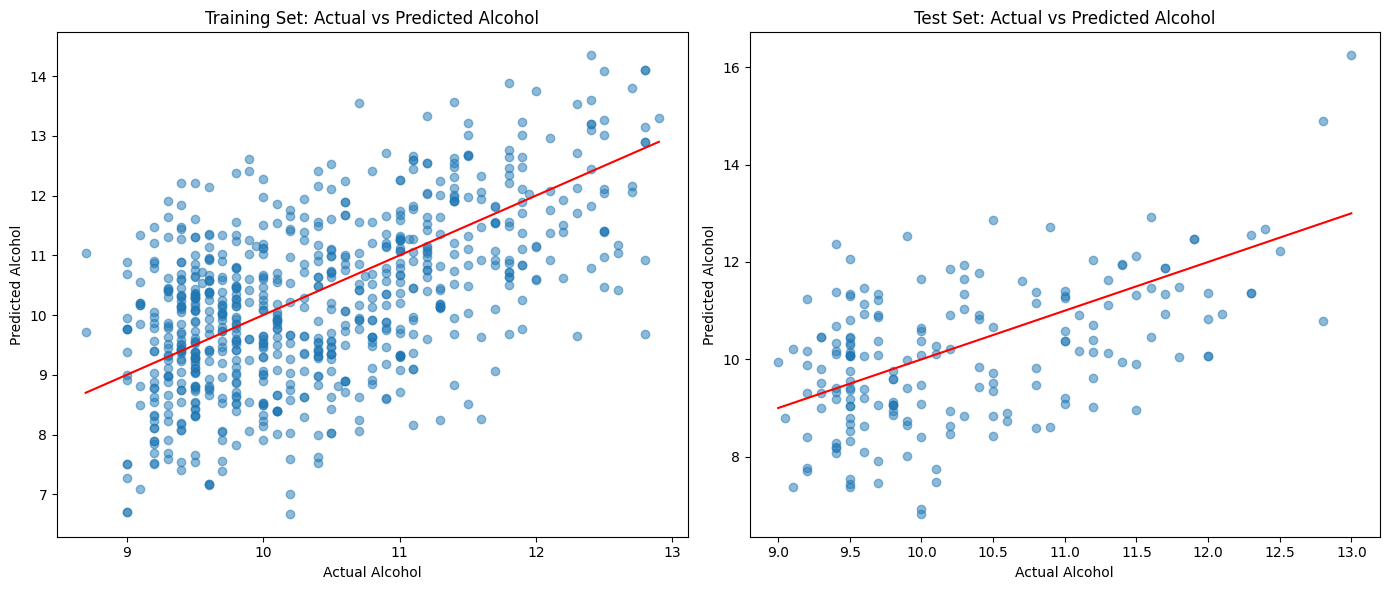

In [327]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared scores for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.2f}')
print(f'Testing MSE: {test_mse:.2f}')
print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/neural_network_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# Visualize the performance with scatter plots (optional)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Training Set: Actual vs Predicted Alcohol')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Test Set: Actual vs Predicted Alcohol')

plt.tight_layout()
plt.show()

In [330]:
final_data.drop(columns=['alcohol_category'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.463779,1.070308,-1.361974,-0.616058,-0.074556,-0.425386,-0.200047,0.953397,1.433457,-0.597417,9.4
1,-0.137276,2.160443,-1.361974,1.282137,1.752973,1.320552,1.350010,0.259944,-1.150326,0.544647,9.8
2,-0.137276,1.433686,-1.124217,0.468625,1.254556,0.073454,0.739382,0.398634,-0.650239,0.259131,9.8
3,2.638003,-1.473343,1.966626,-0.616058,-0.157626,0.322873,1.021210,1.092087,-1.483718,-0.407073,9.8
4,-0.463779,1.070308,-1.361974,-0.616058,-0.074556,-0.425386,-0.200047,0.953397,1.433457,-0.597417,9.4
...,...,...,...,...,...,...,...,...,...,...,...
922,-1.361664,-0.080391,-0.589263,0.468625,-0.074556,1.819391,0.081782,-0.475116,0.683327,1.210851,11.0
923,-0.953534,0.585803,-0.886460,-0.616058,-0.739112,1.694681,-0.012161,0.058843,0.683327,1.877055,9.5
924,-1.443289,0.464676,-0.886460,-0.344887,1.088417,2.193521,0.269668,-1.057617,0.933370,-0.407073,10.5
925,-1.361664,-0.080391,-0.589263,0.468625,-0.074556,1.819391,0.081782,-0.475116,0.683327,1.210851,11.0
